# Predicting Obesity Levels with Machine Learning

## 1. General overview of the Dataframe

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading df
url = 'https://raw.githubusercontent.com/AndrsGzRo/Predicting-Obesity-Levels-with-Machine-Learning/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(url)

# Showing the first five rows
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##  1.1 General information

In [3]:
# General information about the Dataframe for a better understanding
def df_overview(df):
    print('----General information about the DataFrame----')
    print(df.info())
    print('----General statistics of the df----')
    print(df.describe())
    print('----Null values----')
    print(df.isnull().sum().sort_values(ascending=False))
    print('----Unique values----')
    print(df.nunique())
df_overview(df)

----General information about the DataFrame----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null  

## 1.2 Individual Distributions


### 1.2.1 Numeric Distributions

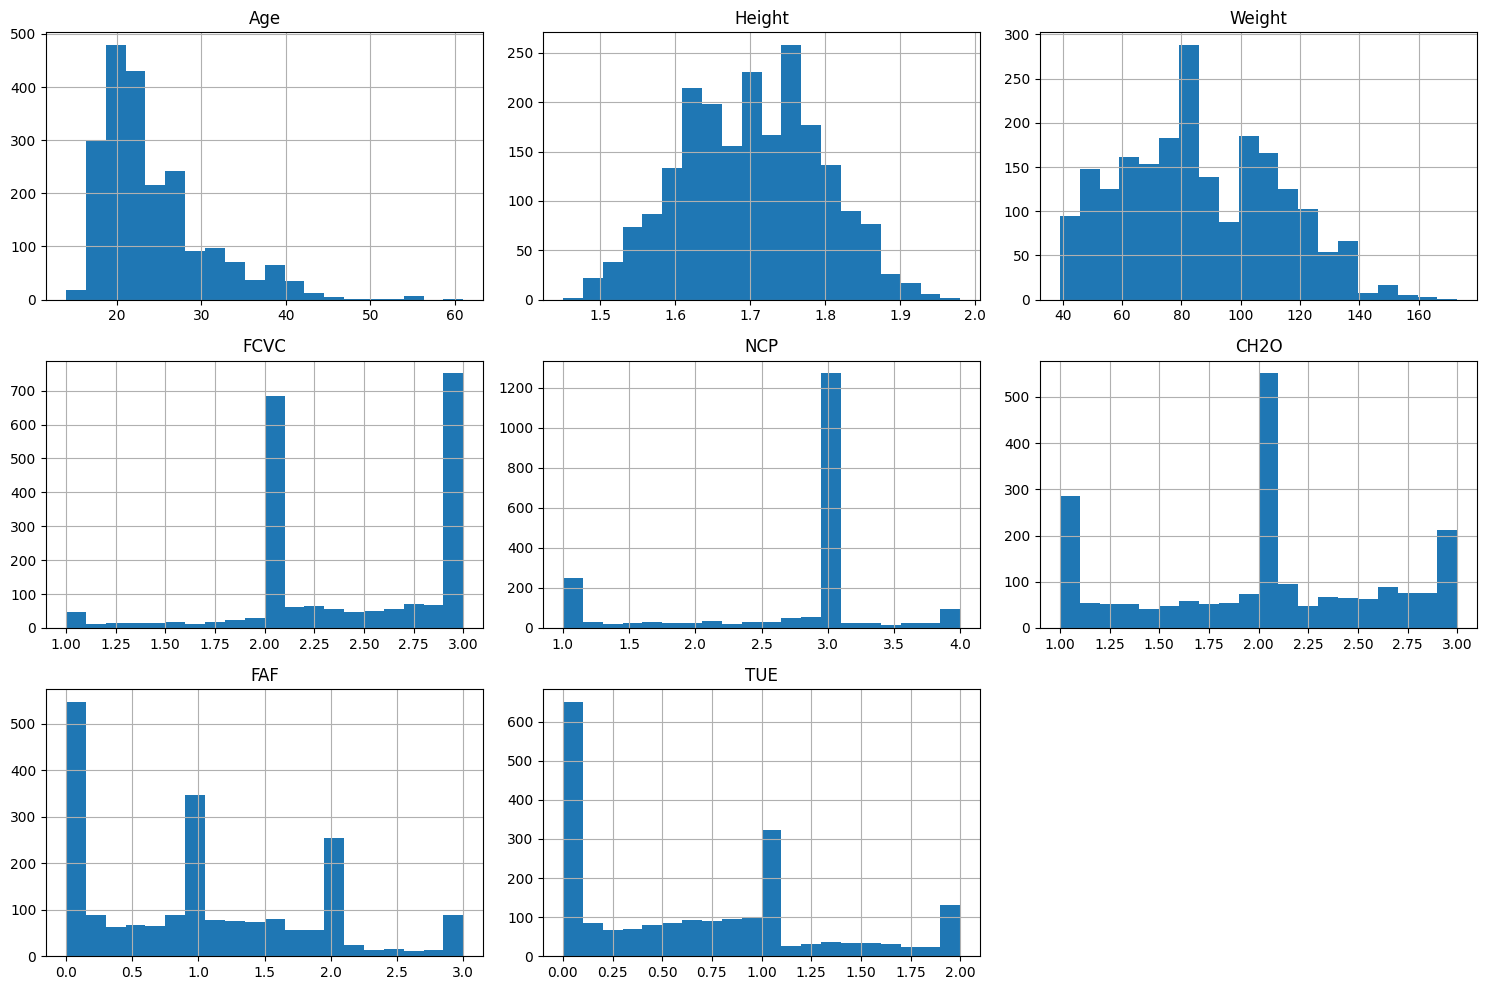

In [4]:
# Selecting numeric columns
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].hist(figsize=(15,10),bins=20)
plt.tight_layout()
plt.show()

### 1.2.2 Categorical Distributions

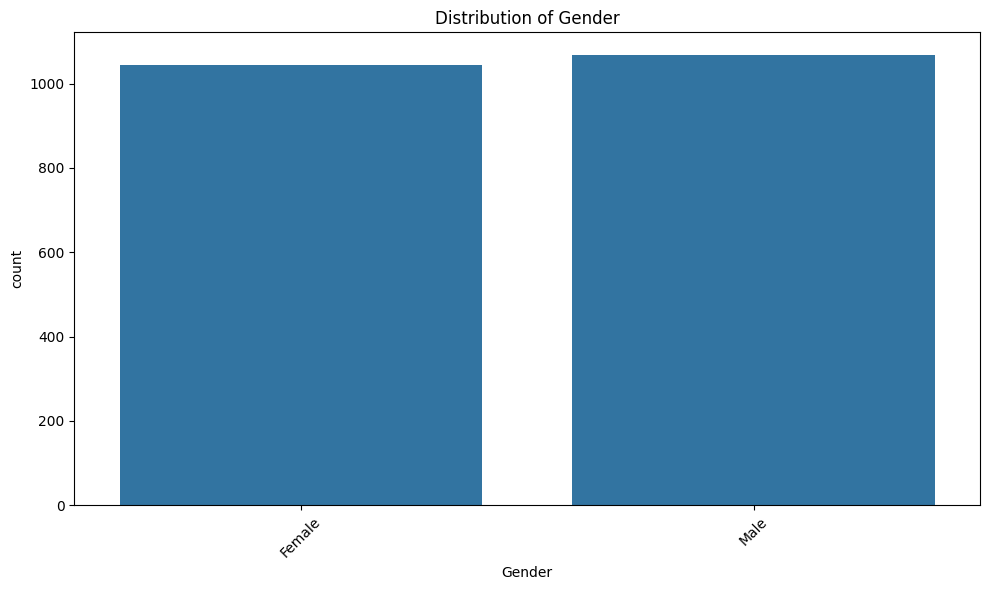

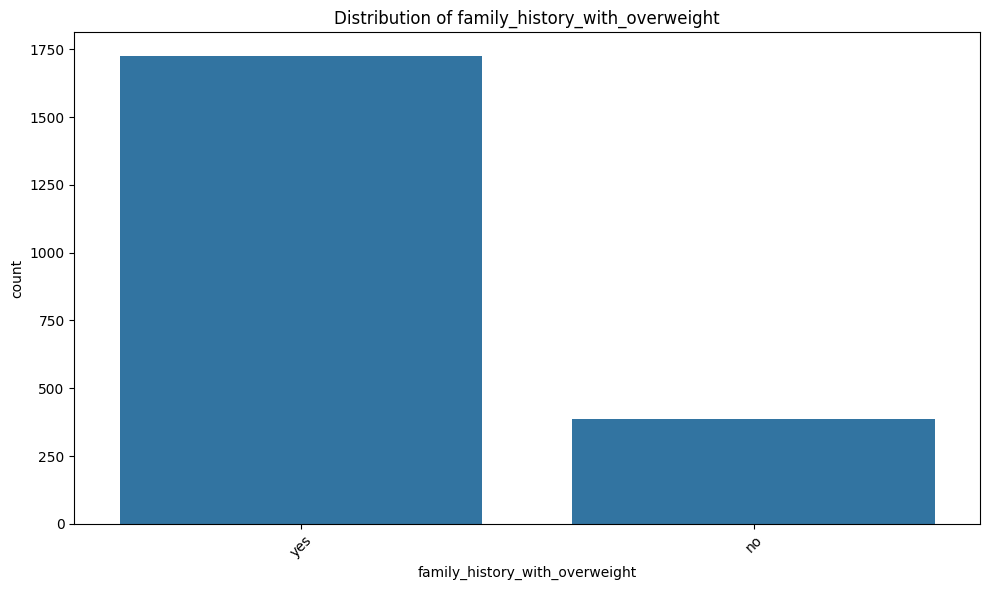

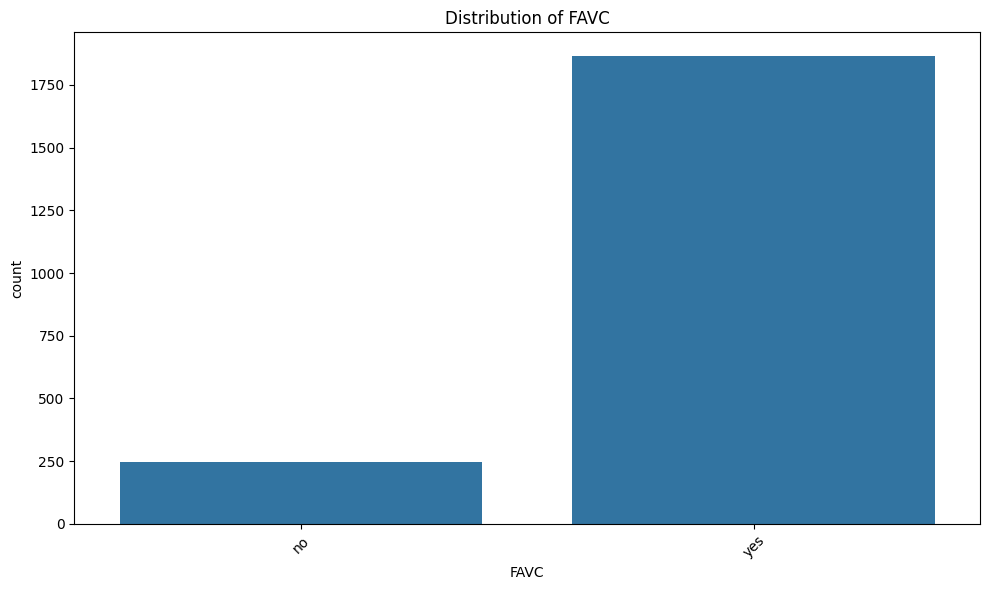

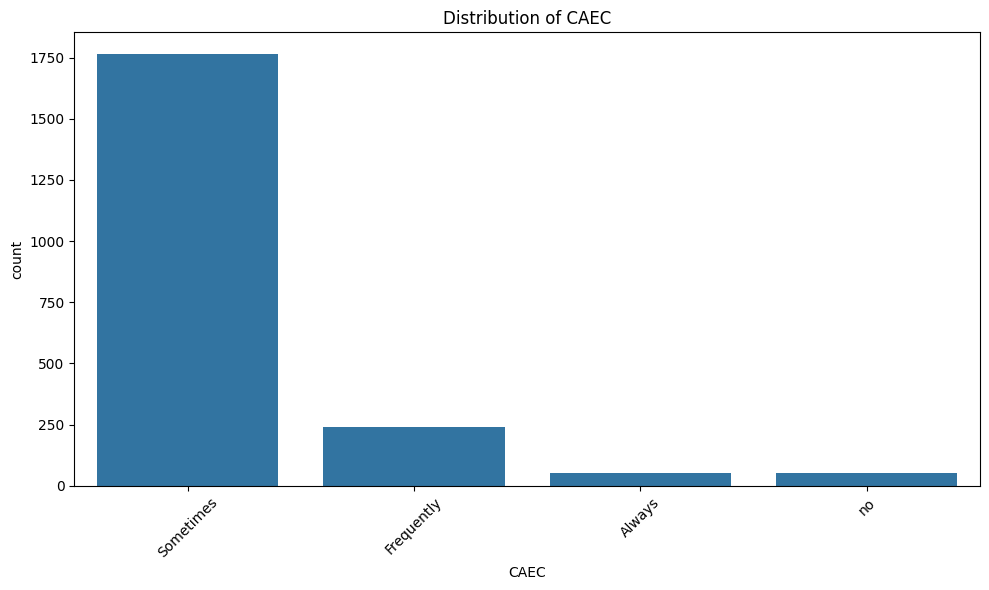

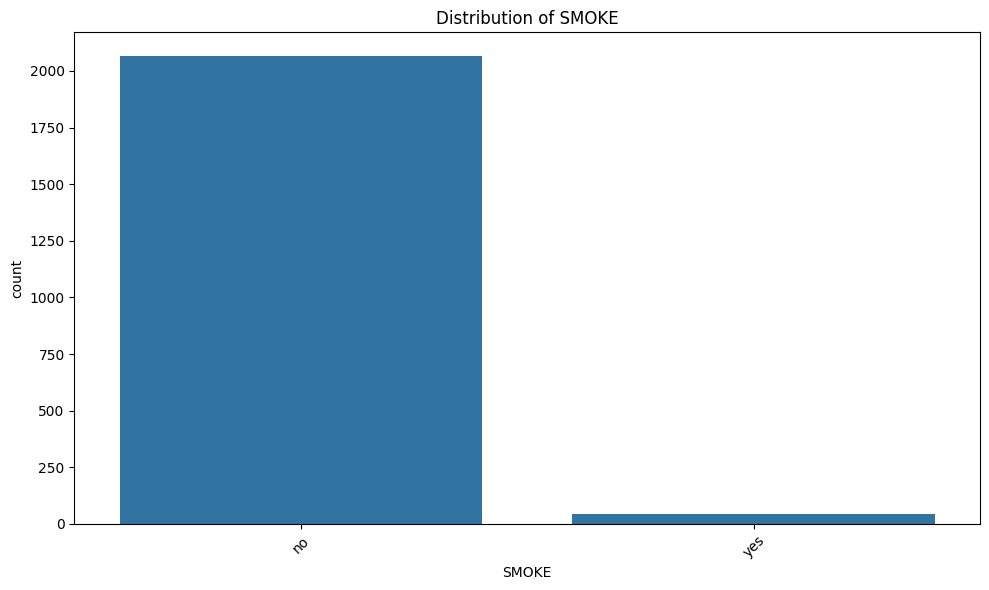

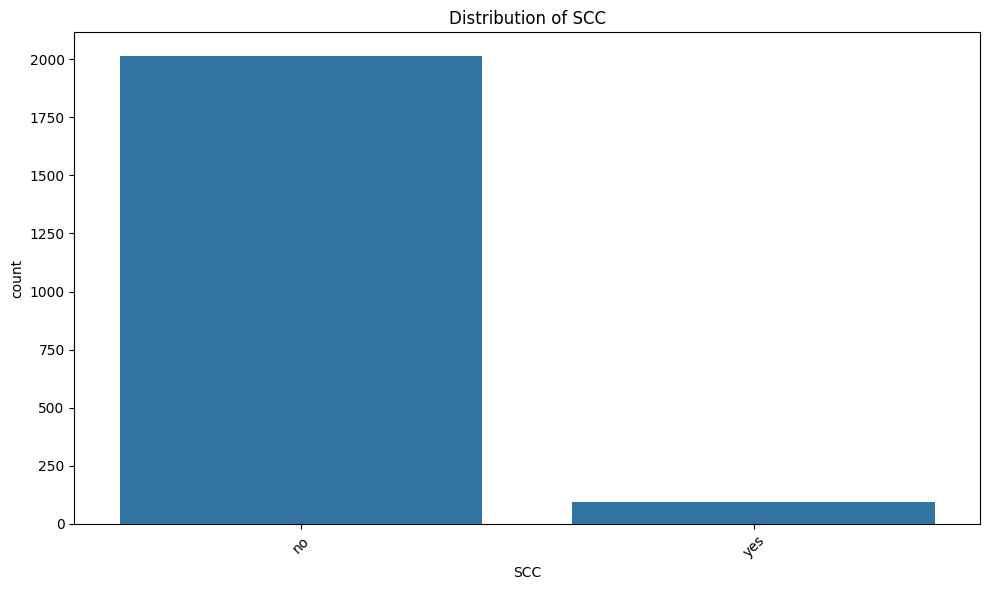

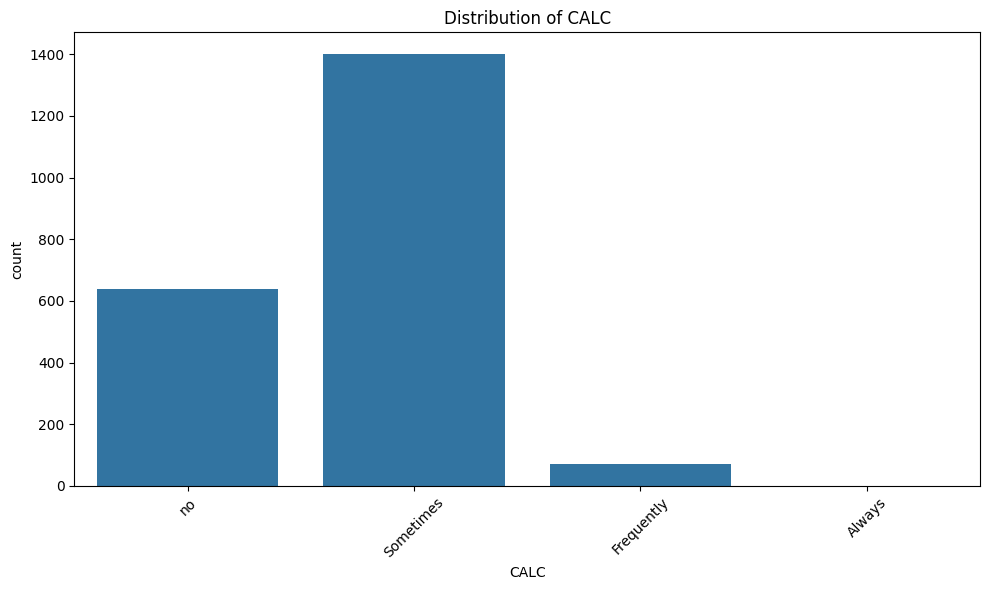

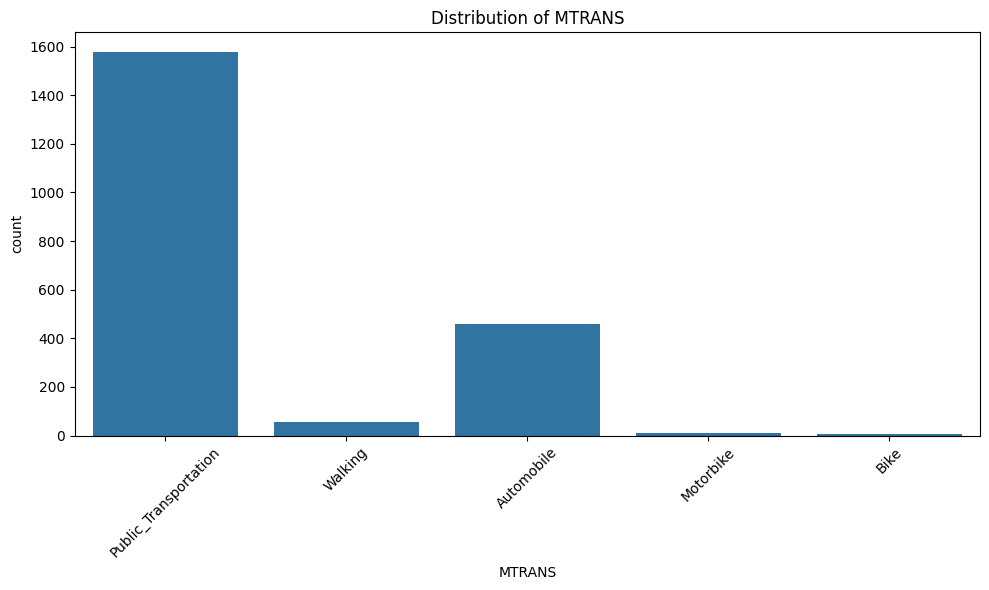

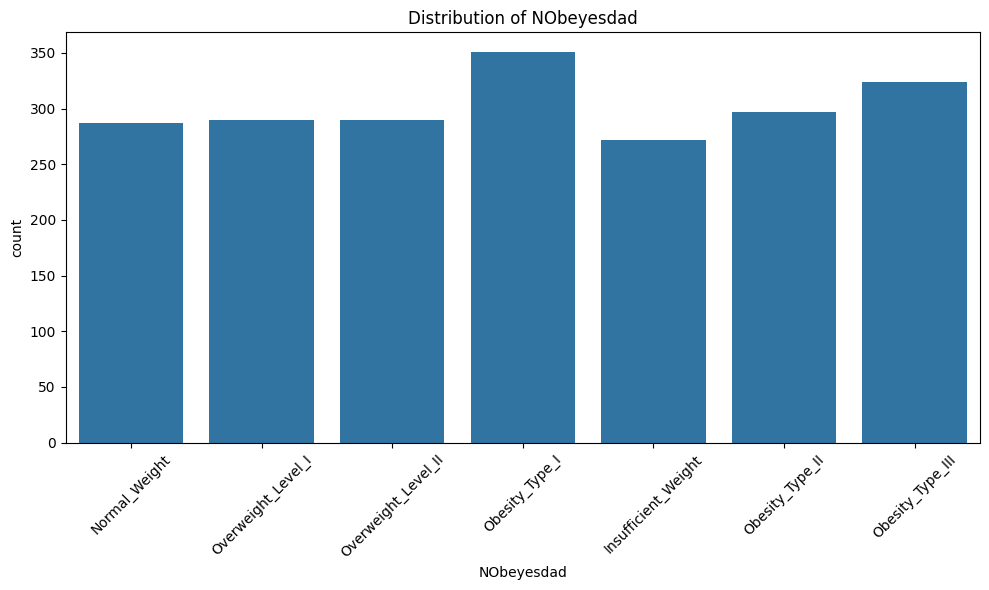

In [5]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df,x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 1.3 Numerical Correlation Analysis

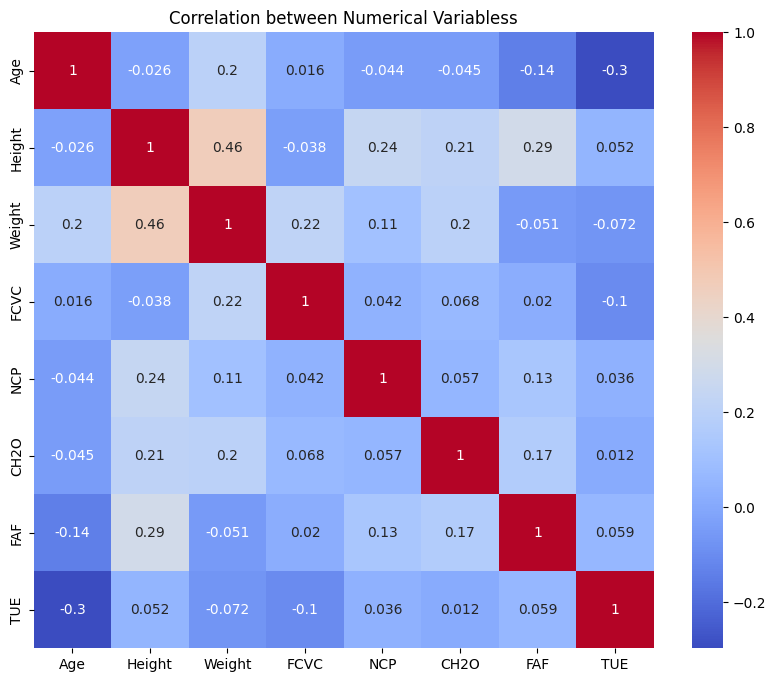

In [6]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation between Numerical Variabless')
plt.show()

## 2. Transforming Categorical Variables

### 2.1 Pandas Get Dummies

In [7]:
# Copying the original dataframe
df_encoded = df.copy()

# Encoding columns that have 'yes/no' answers.
cols_to_encode = ['family_history_with_overweight','FAVC','SMOKE','SCC']
df_encoded = pd.get_dummies(df_encoded,columns=cols_to_encode,
                            drop_first=False,dtype=int)
df_encoded.head()

,Gender,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,...,MTRANS,NObeyesdad,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes
0,Female,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,...,Public_Transportation,Normal_Weight,0,1,1,0,1,0,1,0
1,Female,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,...,Public_Transportation,Normal_Weight,0,1,1,0,0,1,0,1
2,Male,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,...,Public_Transportation,Normal_Weight,0,1,1,0,1,0,1,0
3,Male,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,...,Walking,Overweight_Level_I,1,0,1,0,1,0,1,0
4,Male,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,...,Public_Transportation,Overweight_Level_II,1,0,1,0,1,0,1,0


#### 2.1.2 Mode of Transportation (MTRANS)

In [8]:
df_encoded = pd.get_dummies(df_encoded,columns=['MTRANS'],
                            drop_first=True,dtype=int)
df_encoded.head()

,Gender,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,...,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,...,1,0,1,0,1,0,0,0,1,0
1,Female,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,...,1,0,0,1,0,1,0,0,1,0
2,Male,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,...,1,0,1,0,1,0,0,0,1,0
3,Male,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,...,1,0,1,0,1,0,0,0,0,1
4,Male,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,...,1,0,1,0,1,0,0,0,1,0


### 2.2 Codification

#### 2.2.1 Gender

In [9]:
df_encoded['Gender'] = df_encoded['Gender'].map({'Female':0,'Male':1})
df_encoded.head()

,Gender,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,...,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,...,1,0,1,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,...,1,0,0,1,0,1,0,0,1,0
2,1,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,...,1,0,1,0,1,0,0,0,1,0
3,1,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,...,1,0,1,0,1,0,0,0,0,1
4,1,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,...,1,0,1,0,1,0,0,0,1,0


#### 2.2.2 Food between Meals (CAEC)

In [10]:
caec = {
    'no':0,
    'Sometimes':1,
    'Frequently':2,
    'Always':3
}
df_encoded['CAEC'] = df_encoded['CAEC'].map(caec)
df_encoded.head()

,Gender,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,...,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,2.0,3.0,1,2.0,0.0,1.0,...,1,0,1,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,3.0,3.0,1,3.0,3.0,0.0,...,1,0,0,1,0,1,0,0,1,0
2,1,23.0,1.80,77.0,2.0,3.0,1,2.0,2.0,1.0,...,1,0,1,0,1,0,0,0,1,0
3,1,27.0,1.80,87.0,3.0,3.0,1,2.0,2.0,0.0,...,1,0,1,0,1,0,0,0,0,1
4,1,22.0,1.78,89.8,2.0,1.0,1,2.0,0.0,0.0,...,1,0,1,0,1,0,0,0,1,0


#### 2.2.3 Alcohol Consumption (CALC)

In [11]:
calc = {
    'no':0,
    'Sometimes':1,
    'Frequently':2,
    'Always':3
}
df_encoded['CALC'] = df_encoded['CALC'].map(calc)
df_encoded.head()

,Gender,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,...,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,2.0,3.0,1,2.0,0.0,1.0,...,1,0,1,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,3.0,3.0,1,3.0,3.0,0.0,...,1,0,0,1,0,1,0,0,1,0
2,1,23.0,1.80,77.0,2.0,3.0,1,2.0,2.0,1.0,...,1,0,1,0,1,0,0,0,1,0
3,1,27.0,1.80,87.0,3.0,3.0,1,2.0,2.0,0.0,...,1,0,1,0,1,0,0,0,0,1
4,1,22.0,1.78,89.8,2.0,1.0,1,2.0,0.0,0.0,...,1,0,1,0,1,0,0,0,1,0


### 2.3 Obesity Level (NObeyesdad)

In [12]:
obesity_order = {
    'Insufficient_Weight':0,
    'Normal_Weight':1,
    'Overweight_Level_I':2,
    'Overweight_Level_II':3,
    'Obesity_Type_I':4,
    'Obesity_Type_II':5,
    'Obesity_Type_III':6
}
df_encoded['NObeyesdad'] = df_encoded['NObeyesdad'].map(obesity_order)
df_encoded.head()

,Gender,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,...,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,2.0,3.0,1,2.0,0.0,1.0,...,1,0,1,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,3.0,3.0,1,3.0,3.0,0.0,...,1,0,0,1,0,1,0,0,1,0
2,1,23.0,1.80,77.0,2.0,3.0,1,2.0,2.0,1.0,...,1,0,1,0,1,0,0,0,1,0
3,1,27.0,1.80,87.0,3.0,3.0,1,2.0,2.0,0.0,...,1,0,1,0,1,0,0,0,0,1
4,1,22.0,1.78,89.8,2.0,1.0,1,2.0,0.0,0.0,...,1,0,1,0,1,0,0,0,1,0


In [13]:
# Overview of the encoded dataframe
df_overview(df_encoded)

----General information about the DataFrame----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              2111 non-null   int64  
 1   Age                                 2111 non-null   float64
 2   Height                              2111 non-null   float64
 3   Weight                              2111 non-null   float64
 4   FCVC                                2111 non-null   float64
 5   NCP                                 2111 non-null   float64
 6   CAEC                                2111 non-null   int64  
 7   CH2O                                2111 non-null   float64
 8   FAF                                 2111 non-null   float64
 9   TUE                                 2111 non-null   float64
 10  CALC                                2111 non-null   int64  


## 3. Pairplot

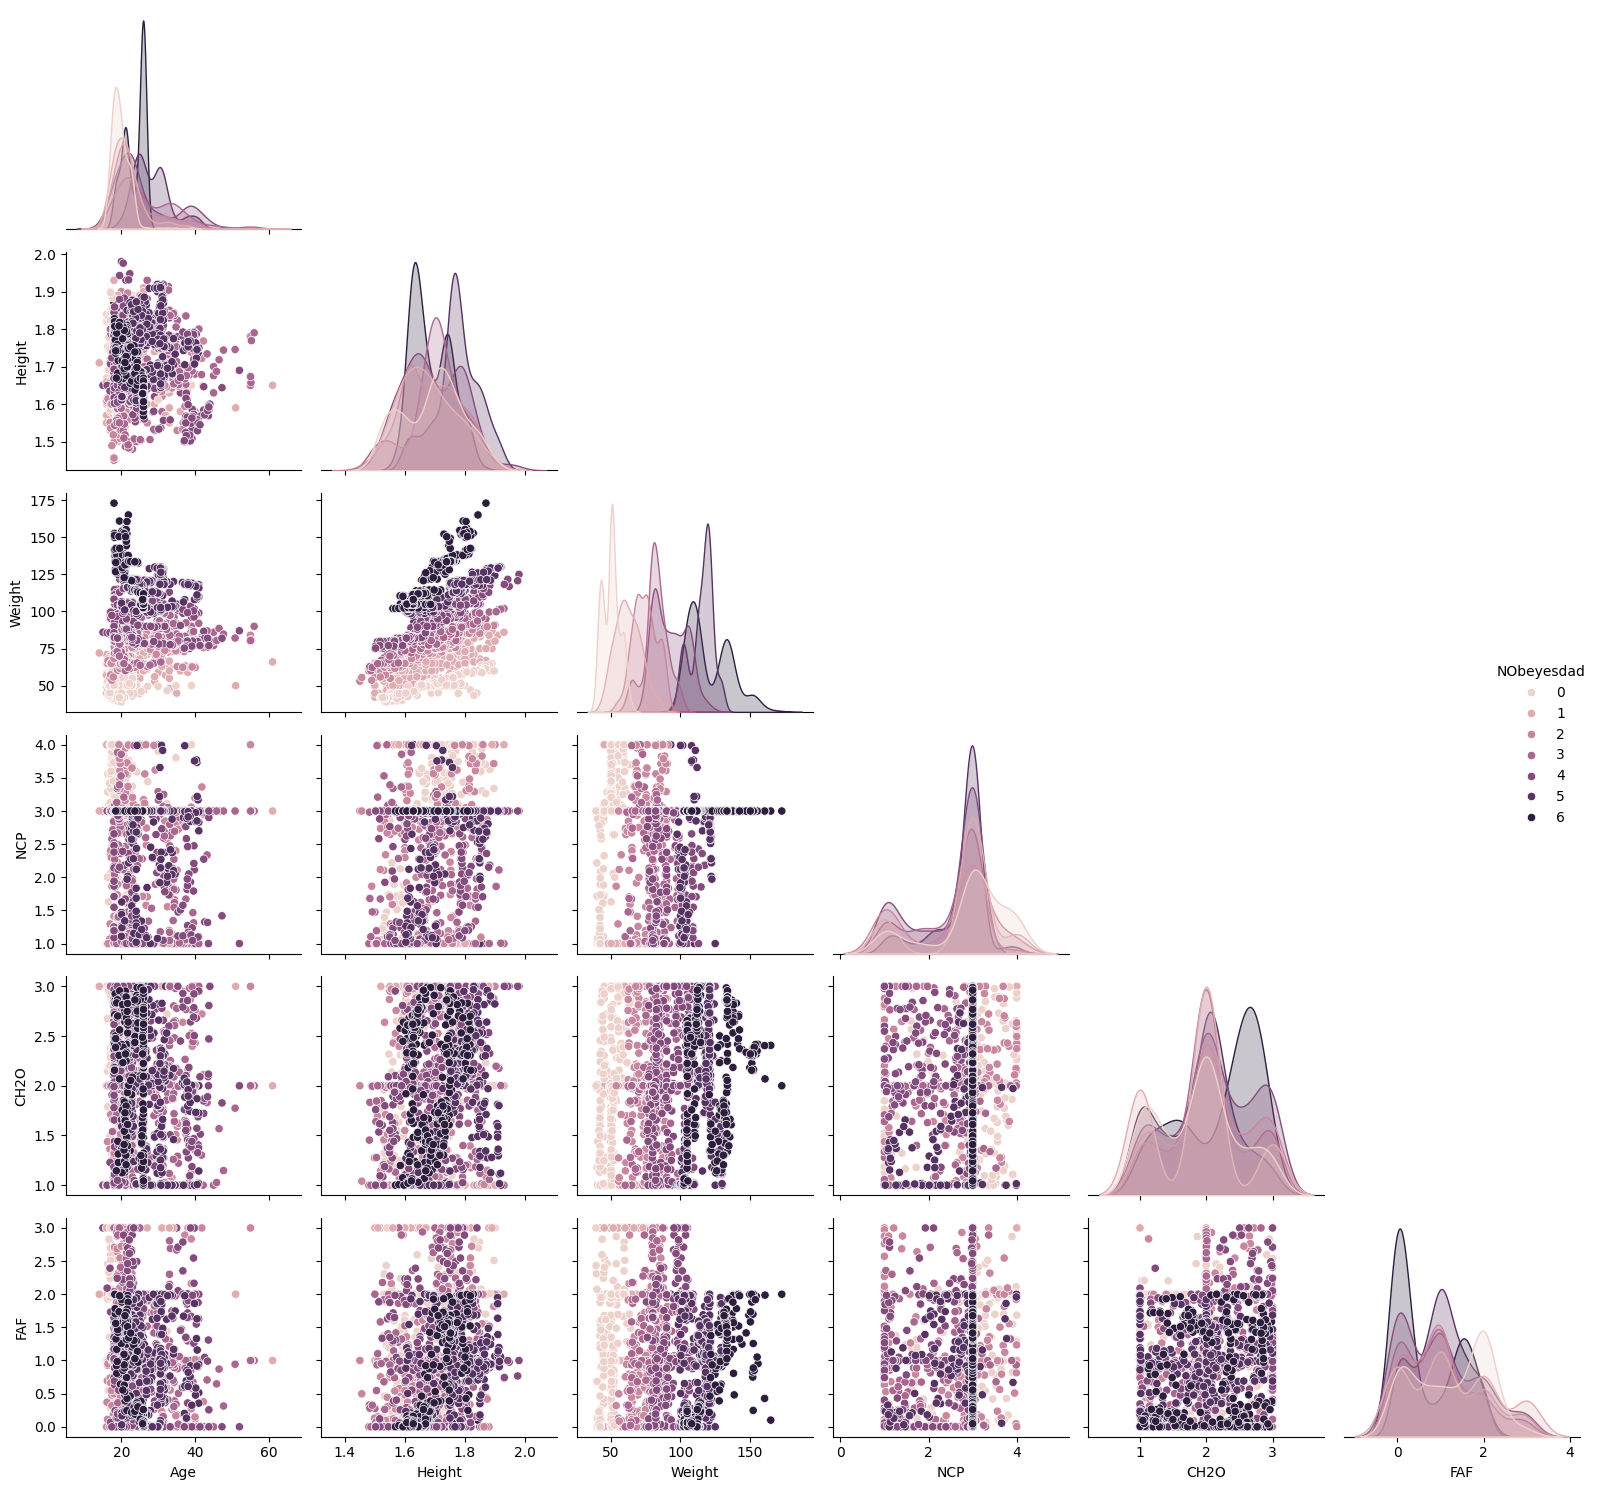

In [14]:
# Selecting columns to plot
cols_to_plot = ['Age','Height','Weight','NCP','CH2O',
                'FAF','NObeyesdad']
sns.pairplot(df_encoded[cols_to_plot],hue='NObeyesdad',corner=True)
plt.tight_layout()
plt.show()

## 4. Machine Learning Model

### 4.1 Training and Test Sets

In [17]:
from sklearn.model_selection import train_test_split
# 80% for training and 20% for validation

X = df_encoded.drop(columns=['NObeyesdad'])
y = df_encoded['NObeyesdad']

X_train,X_val,y_train,y_val = train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (1688, 23)
y_train shape: (1688,)
X_val shape: (423, 23)
y_val shape: (423,)


### 4.2 Correlation between Training Variables

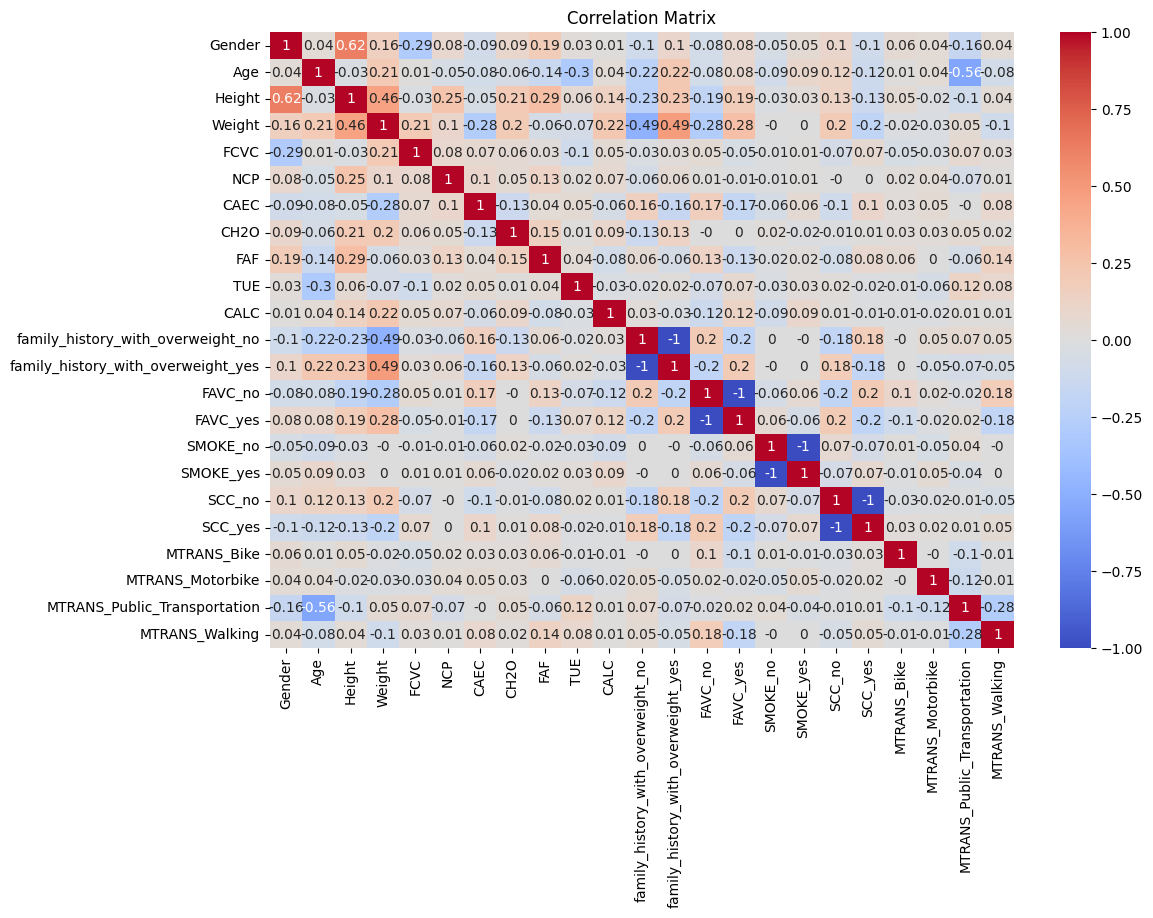

In [18]:
corr_matrix = X_train.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix.round(2),
            annot=True,
            cmap='coolwarm',
            vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.show()

### 4.3 Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### 4.4 Mapping Classes

In [36]:
label_map = {
    0:'Insufficient_Weight',
    1:'Normal_Weight',
    2:'Overweight_Level_I',
    3:'Overweight_Level_II',
    4:'Obesity_Type_I',
    5:'Obesity_Type_II',
    6:'Obesity_Type_III'
}

y_train_labels = y_train.map(label_map)
y_val_labels = y_val.map(label_map)

## 5. RandomForestClasiffier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_split = 10,
    min_samples_leaf=5,
    n_jobs = -1,
    random_state=42,
)

# Training
rf.fit(X_train_scaled,y_train)

# Predict
y_pred = rf.predict(X_val_scaled)

# Score
rf.score(X_val_scaled,y_val)

0.7848699763593381

### 5.1 Confussion Matrix

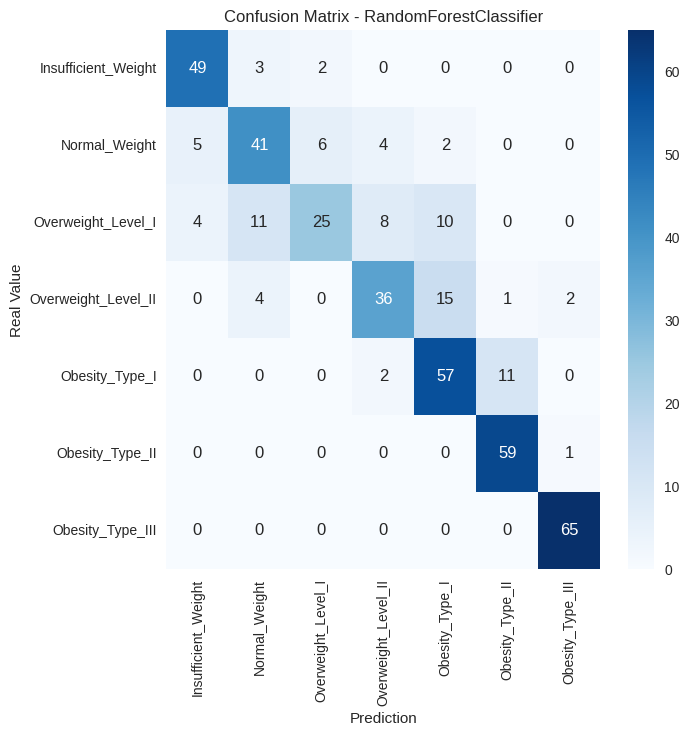

In [48]:
from sklearn.metrics import confusion_matrix
# Labels
labels = [0,1,2,3,4,5,6]
classes= [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# Predict
y_pred = rf.predict(X_val_scaled)

# Confussion Matrix
cm = confusion_matrix(y_val,y_pred,labels=labels)
cm_df = pd.DataFrame(cm,index=classes,columns=classes)

# Plot
# Plot
plt.figure(figsize=(7,7))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.show()

The interpretation of the confusion matrix is the following:
- **Class 0 - Insufficient Weight**:
    - 49 people with insufficient weight were classified correctly as *Insufficient_Weight.*
    - 3 people were classified as *Normal_Weight*-
    - 2 people were classified as *Overweight_Level_1*.

- **Class 1 - Normal Weight**:
    - 41 people with normal weight were classified correctly as *Normal_Weight*.
    - 5 people were classified as *Insufficient_Weight*.
    - 6 people were classified as *Overweight_Level_I*.
    - 4 people were classified as *Overweight_Level_I**.
    - 2 people were classifed as *Overweight_Level_II**.

- **Class 2 Overweight Level I**:
    - 25 people were classified correctly as *Overweight_Level_I*
    - 4 as *Insufficient_Weight*.
    - 11  as *Normal_Weight*.
    - 8 as *Overweight_Level_II*.
    - 10 as *Obesity_Level_I*

